# Тепловая карта

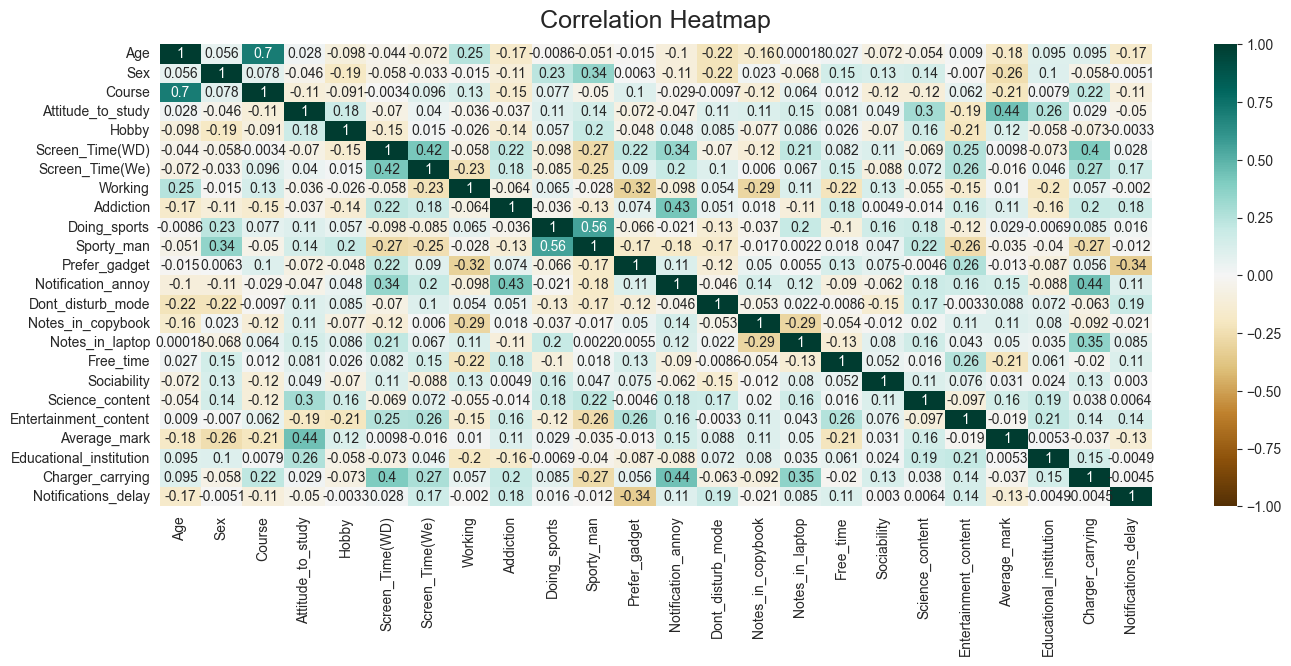

....
 
....


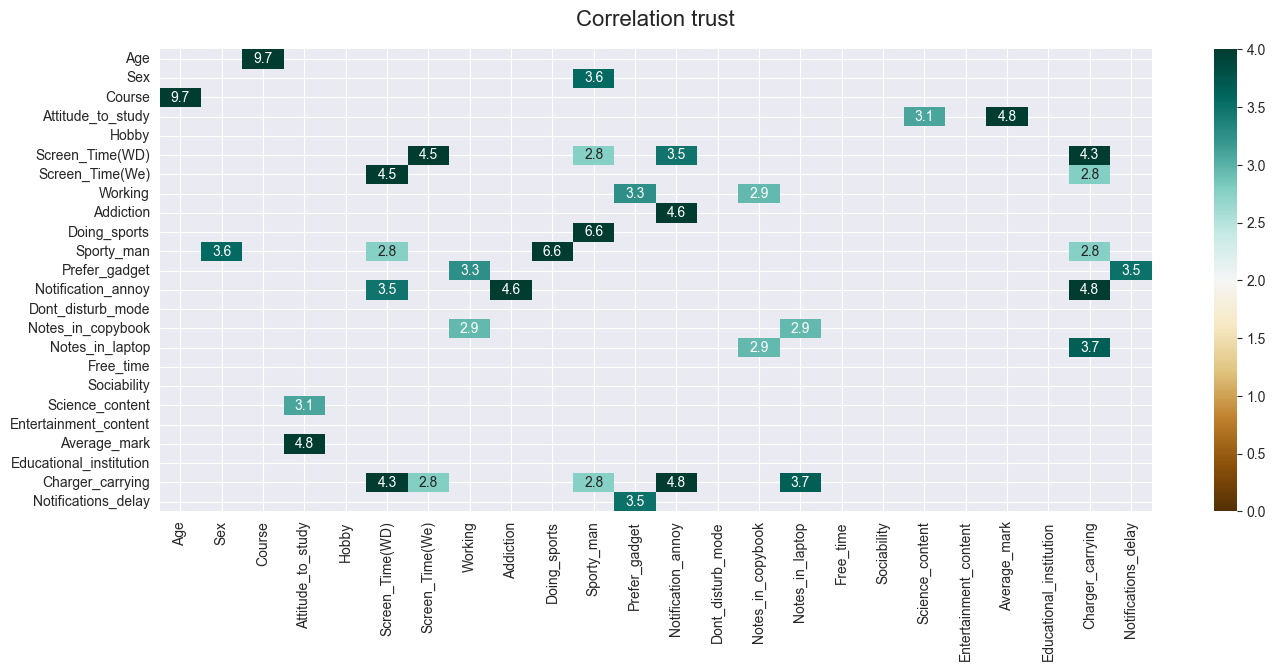

Пирсон Addiction, Notification_annoy : 
 PearsonRResult(statistic=0.4268807377622308, pvalue=1.4430099756297888e-05) 


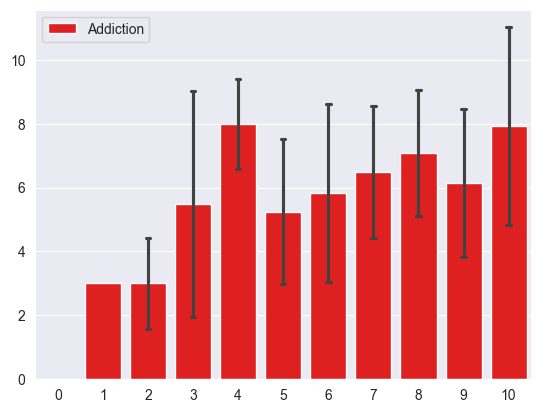

Average_mark, Attitude_to_study 
 PearsonRResult(statistic=0.4448055737466723, pvalue=5.61388861384405e-06) 


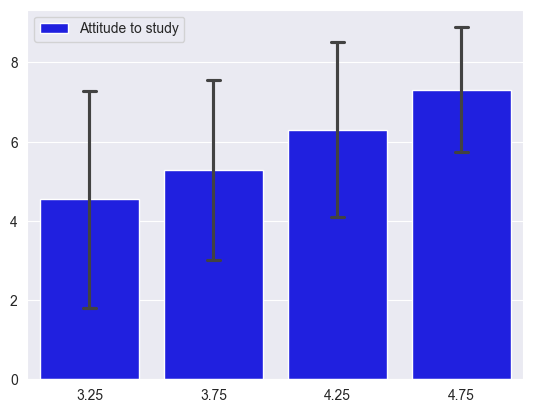

Charger_carrying, Notification_annoy 
 PearsonRResult(statistic=0.4405966258529597, pvalue=7.04100508666582e-06) 


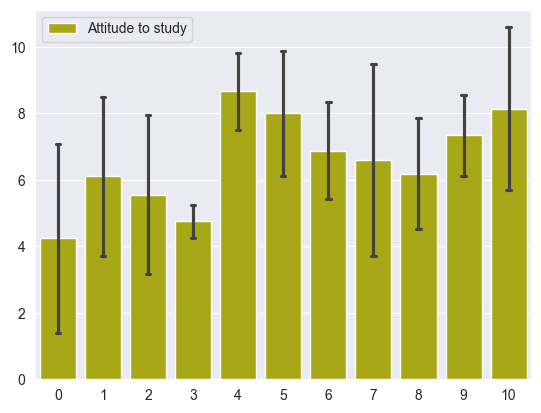

Prefer_gadget, Screen_Time_We 
 PearsonRResult(statistic=0.08960475265281169, pvalue=0.3852896432669245) 


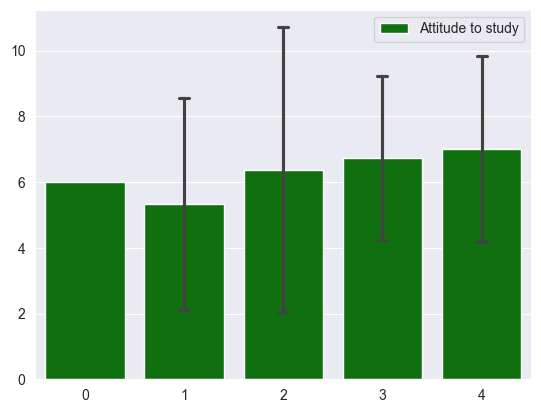

Sporty_man, Sex 
 PearsonRResult(statistic=0.3440333428443549, pvalue=0.0005990106202206335) 


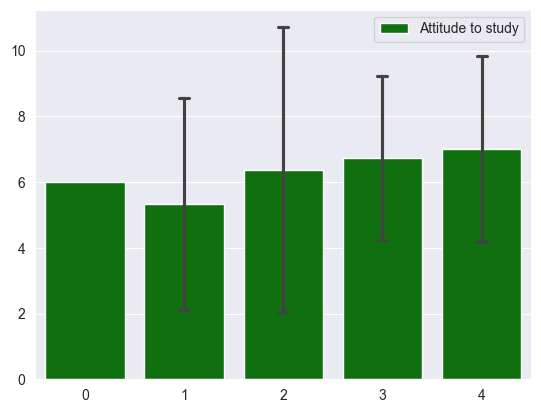

Prefer_gadget, Screen_Time_We 
 PearsonRResult(statistic=0.08960475265281169, pvalue=0.3852896432669245) 


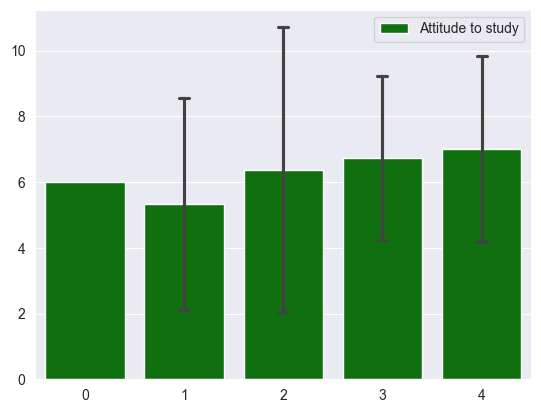

In [2]:
from sklearn.linear_model import LinearRegression
import scipy
import numpy as np
import random
import sklearn
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv

data = pd.read_csv('Answers1.csv')
Age = data['Age'].tolist()
Sex = data['Sex'].tolist()
Course = data['Course'].tolist()
Attitude_to_study = data['Attitude_to_study'].tolist()
Hobby = data['Hobby'].tolist()
Screen_Time_WD = data['Screen_Time(WD)'].tolist()
Screen_Time_We = data['Screen_Time(We)'].tolist()
Working = data['Working'].tolist()
Addiction = data['Addiction'].tolist()
Doing_sports = data['Doing_sports'].tolist()
Sporty_man = data['Sporty_man'].tolist()
Prefer_gadget = data['Prefer_gadget'].tolist()
#Prefer_App_category = data['Prefer_App_category'].tolist()
Notification_annoy = data['Notification_annoy'].tolist()
Dont_disturb_mode = data['Dont_disturb_mode'].tolist()
Notes_in_copybook = data['Notes_in_copybook'].tolist()
Notes_in_laptop = data['Notes_in_laptop'].tolist()
Free_time = data['Free_time'].tolist()
Sociability = data['Sociability'].tolist()
Science_content = data['Science_content'].tolist()
Entertainment_content = data['Entertainment_content'].tolist()
Average_mark = data['Average_mark'].tolist()
Educational_institution = data['Educational_institution'].tolist()
Charger_carrying = data['Charger_carrying'].tolist()
Notifications_delay = data['Notifications_delay'].tolist()

#print(Age, "\n \n", Course, "\n \n", Attitude_to_study, " \n \n", Screen_Time_WD, "\n \n")


df = pd.DataFrame(data)

_= plt.figure(figsize=(16, 6))
mask = np.array(abs(df.corr(method='pearson')) < 0.2)

heatmap = sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12); 

# Сохраните карту как png файл 
# Параметр dpi устанавливает разрешение сохраняемого изображения в точках на дюйм 
# bbox_inches, когда установлен в значение 'tight', не позволяет обрезать лейблы

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()



print("....\n \n....")
_= plt.figure(figsize=(16, 6))
T = abs(df.corr(method='pearson')/(((1-df.corr(method='pearson')**2)/(97-2))**(1/2)))
mask = np.array(T < 2.7)

#print(mask)
heatmap1 = sns.heatmap(T , mask=mask, vmin=0, vmax=4, annot = True, cmap='BrBG')
heatmap1.set_title('Correlation trust', fontdict={'fontsize':16}, pad=17); 
plt.savefig('heatmap1.png', dpi=400, bbox_inches='tight')
plt.show()

test1 = scipy.stats.pearsonr(Addiction, Notification_annoy)
test2 = scipy.stats.pearsonr(Average_mark, Attitude_to_study)
test3 = scipy.stats.pearsonr(Charger_carrying, Notification_annoy)
test4 = scipy.stats.pearsonr(Prefer_gadget, Screen_Time_We)
test5 = scipy.stats.pearsonr(Sporty_man, Sex)
test6 = scipy.stats.pearsonr(Science_content, Attitude_to_study)
test7 = scipy.stats.pearsonr(Charger_carrying, Sporty_man)


print("Пирсон Addiction, Notification_annoy : \n",test1, "\n")

_= sns.barplot(data=data, 
               x=Addiction, 
               y=Notification_annoy, errorbar='sd',color = 'r', 
               capsize=0.1, label="Addiction")
# _ = plt.legend("Notification annoy", "Addiction")
plt.show()
print("Average_mark, Attitude_to_study \n",test2, "\n")



_= sns.barplot(data=data, 
               x=Average_mark, 
               y=Attitude_to_study, errorbar='sd',color = 'b', 
               capsize=0.1, label="Attitude to study")
plt.show()
print("Charger_carrying, Notification_annoy \n",test3, "\n")

_= sns.barplot(data=data, 
               x=Charger_carrying, 
               y=Notification_annoy, errorbar='sd',color = 'y', 
               capsize=0.1, label="Attitude to study")
plt.show()

print("Prefer_gadget, Screen_Time_We \n",test4, "\n")

_= sns.barplot(data=data, 
               x=Prefer_gadget, 
               y=Screen_Time_We, errorbar='sd',color = 'g', 
               capsize=0.1, label="Attitude to study")
plt.show()

print("Sporty_man, Sex \n",test5, "\n")

_= sns.barplot(data=data, 
               x=Prefer_gadget, 
               y=Screen_Time_We, errorbar='sd',color = 'g', 
               capsize=0.1, label="Attitude to study")
plt.show()

print("Prefer_gadget, Screen_Time_We \n",test4, "\n")

_= sns.barplot(data=data, 
               x=Prefer_gadget, 
               y=Screen_Time_We, errorbar='sd',color = 'g', 
               capsize=0.1, label="Attitude to study")
plt.show()

# _= sns.barplot(data=Screen_Time_We, errorbar='sd',color = 'g', 
#                capsize=0.1, label="Screen Time We")
# plt.show()

# shapiro_test = sps.shapiro(Screen_Time_We, Attitude_to_study)
# print("Screen_Time_We, Attitude_to_study \n:", shapiro_test)

# anderson_test = sps.anderson(Screen_Time_We, Attitude_to_study)
# print("Screen_Time_We, Attitude_to_study : \n", anderson_test) 
# 
# dagostino_test = sps.normaltest(Screen_Time_We, Attitude_to_study)
# print("Screen_Time_We, Attitude_to_study :\n",dagostino_test)
# 
# ks_test = sps.kstest(Screen_Time_We, Attitude_to_study)
# print("Screen_Time_We, Attitude_to_study :\n",ks_test)



# Part №2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.6369
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.637
Time:                        09:06:08   Log-Likelihood:                -39.417
No. Observations:                  96   AIC:                             88.83
Df Residuals:                      91   BIC:                             101.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9757      0.081     24.379      0.0

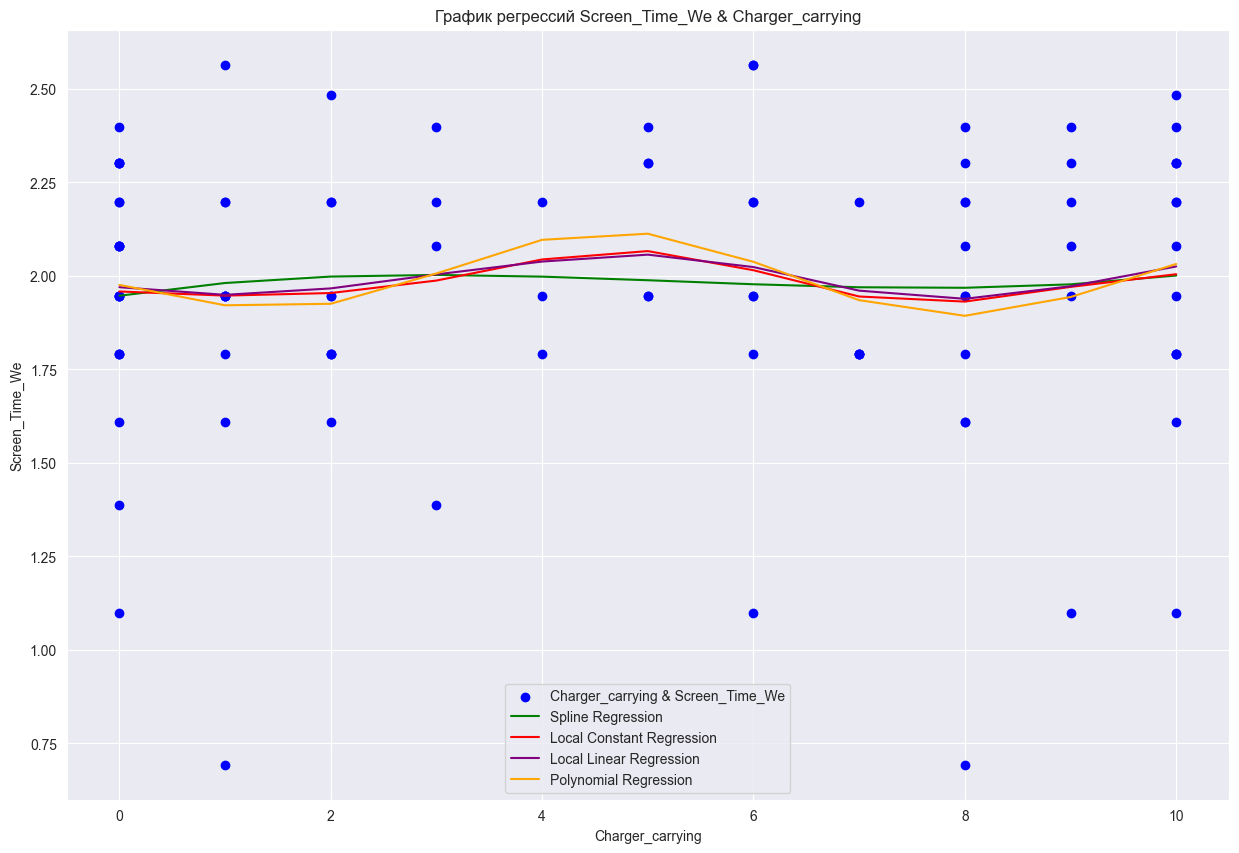

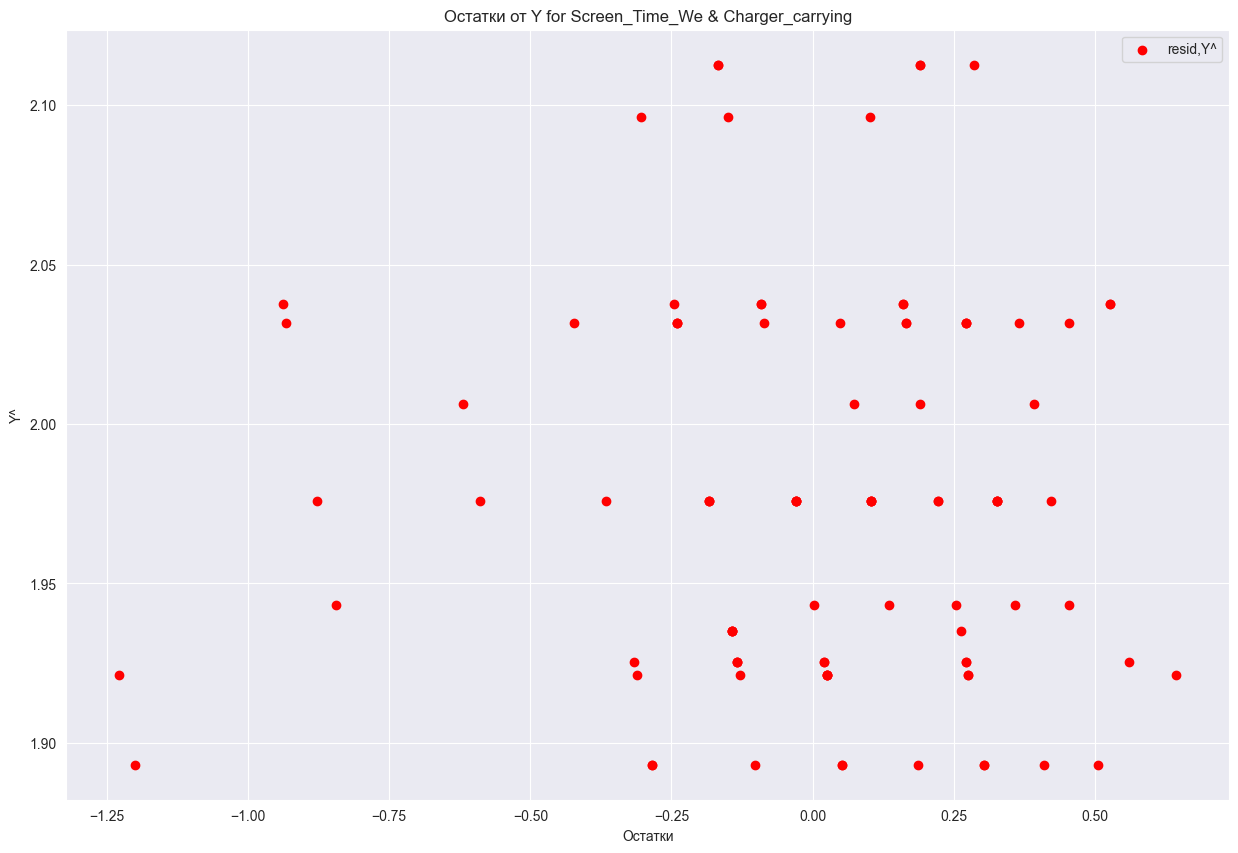

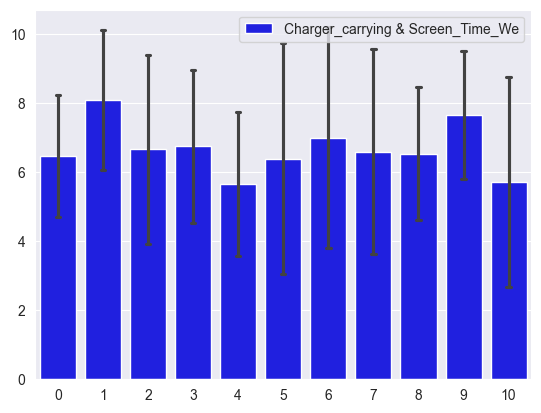

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.042
Method:                 Least Squares   F-statistic:                   0.05091
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.995
Time:                        09:06:11   Log-Likelihood:                -40.635
No. Observations:                  96   AIC:                             91.27
Df Residuals:                      91   BIC:                             104.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9630      0.082     23.916      0.0

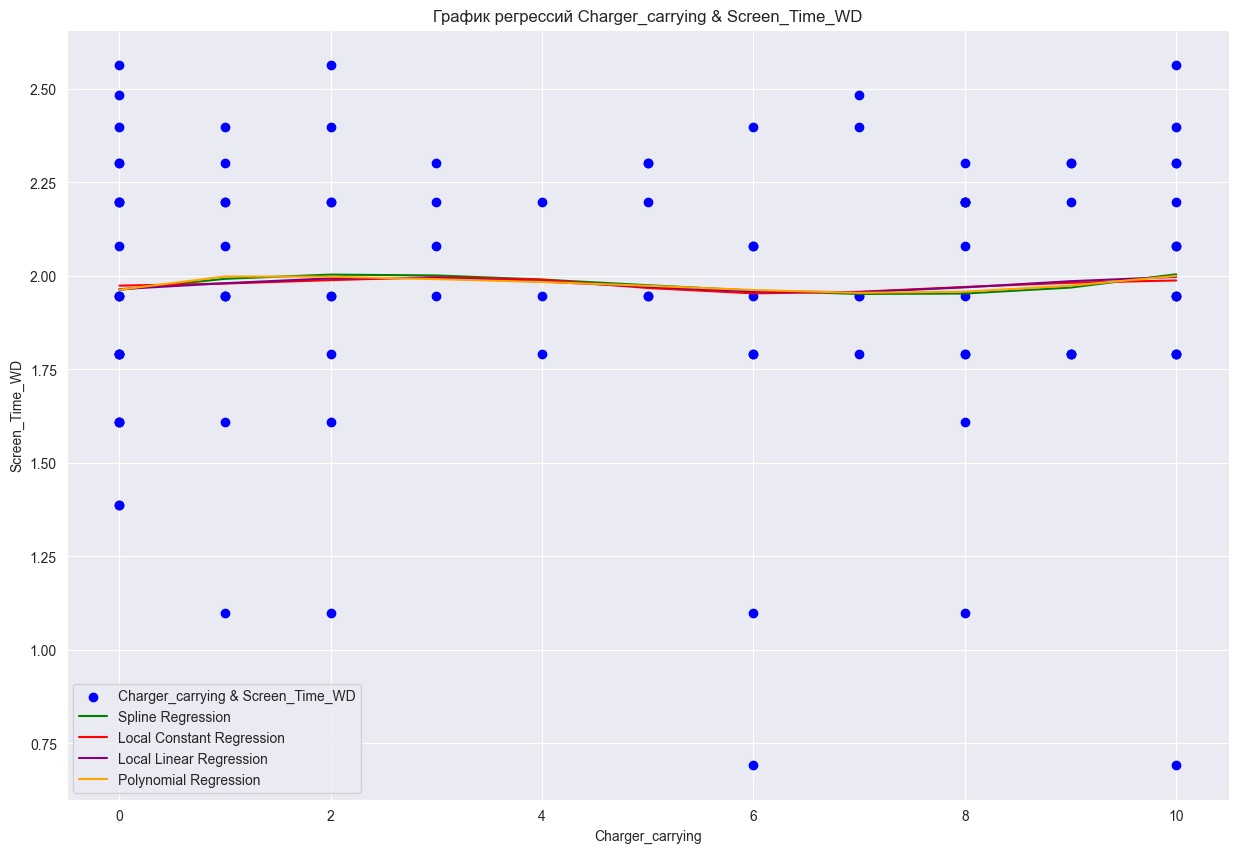

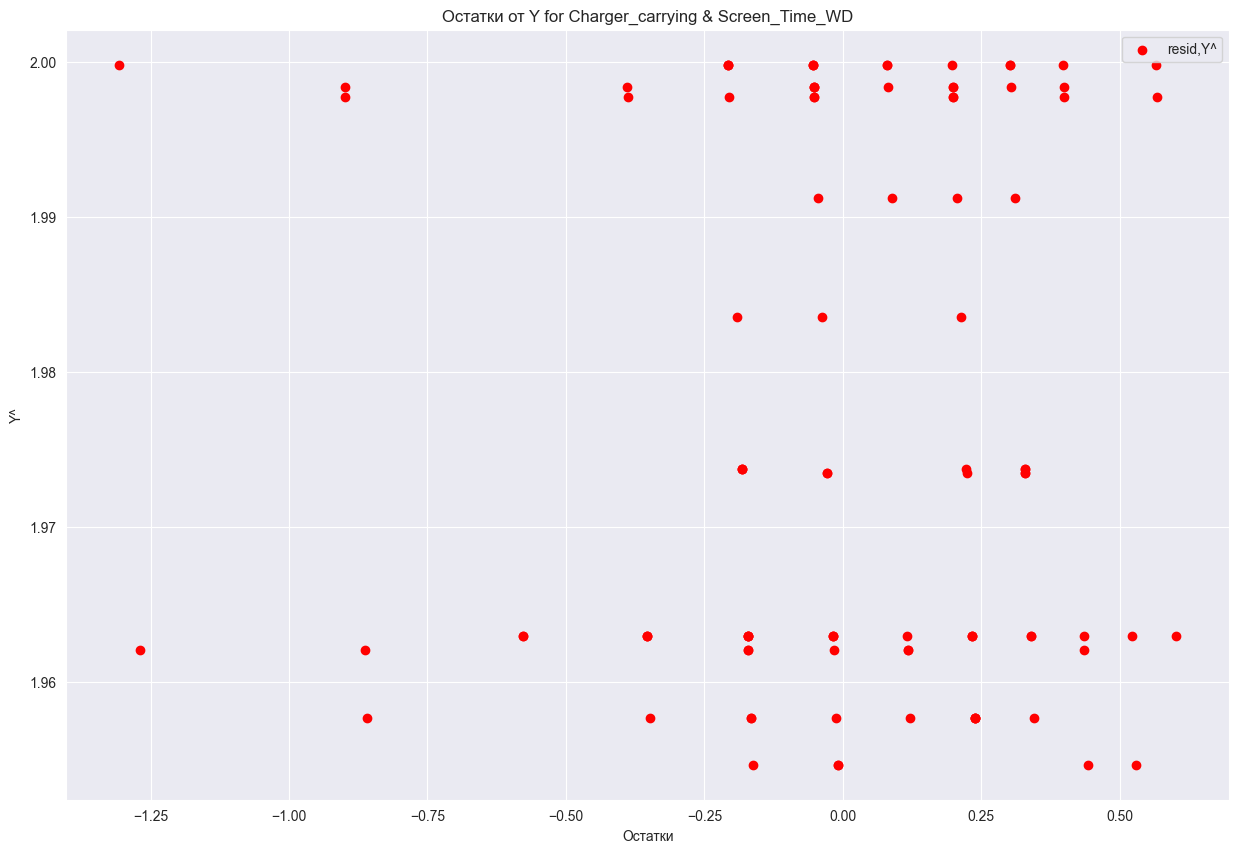

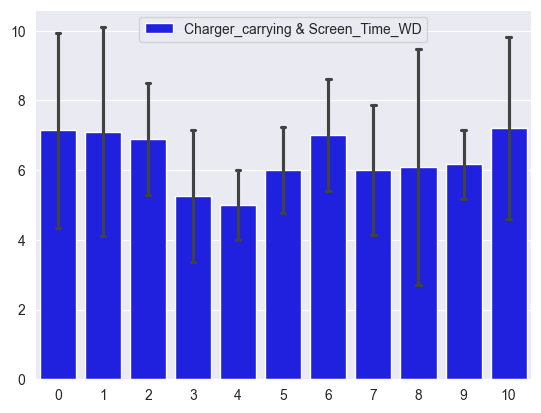

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.5822
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.676
Time:                        09:06:14   Log-Likelihood:                -39.530
No. Observations:                  96   AIC:                             89.06
Df Residuals:                      91   BIC:                             101.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0384      0.081     25.123      0.0

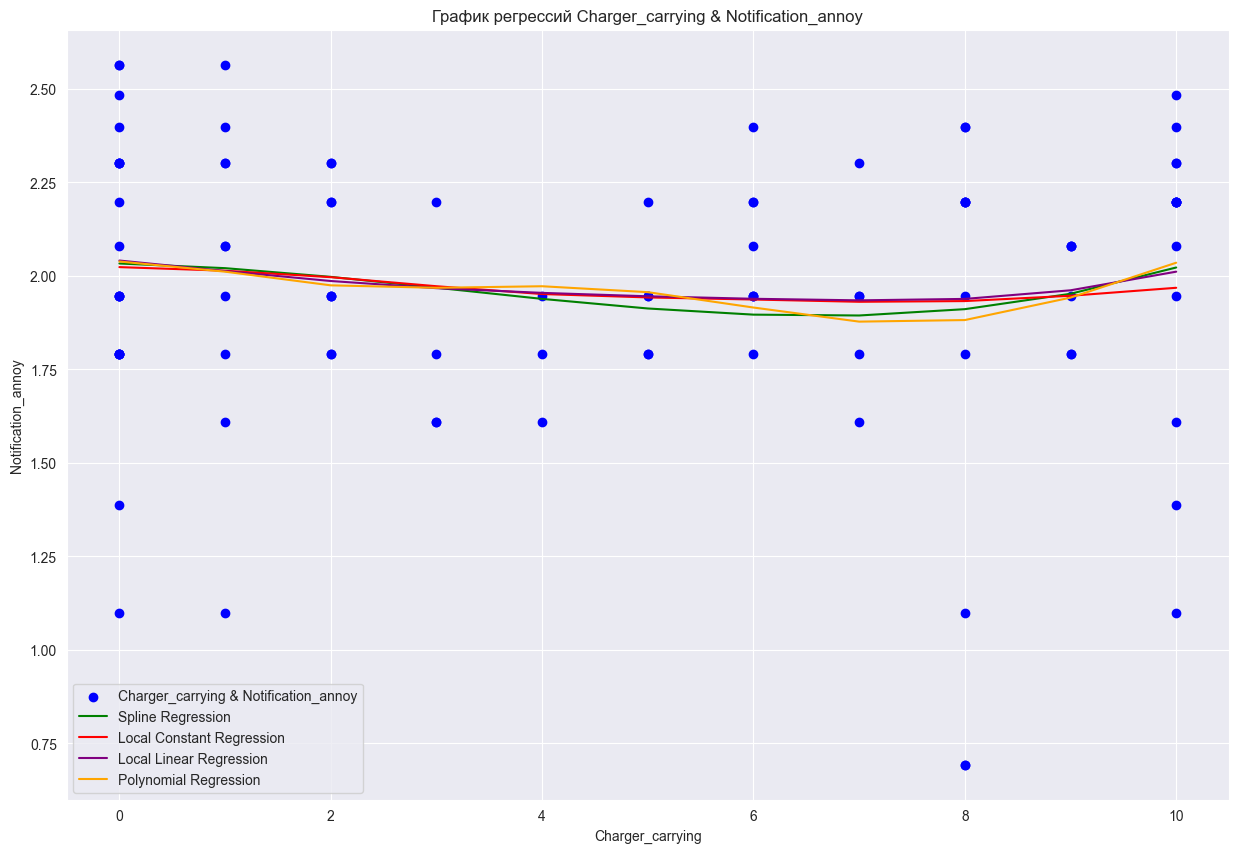

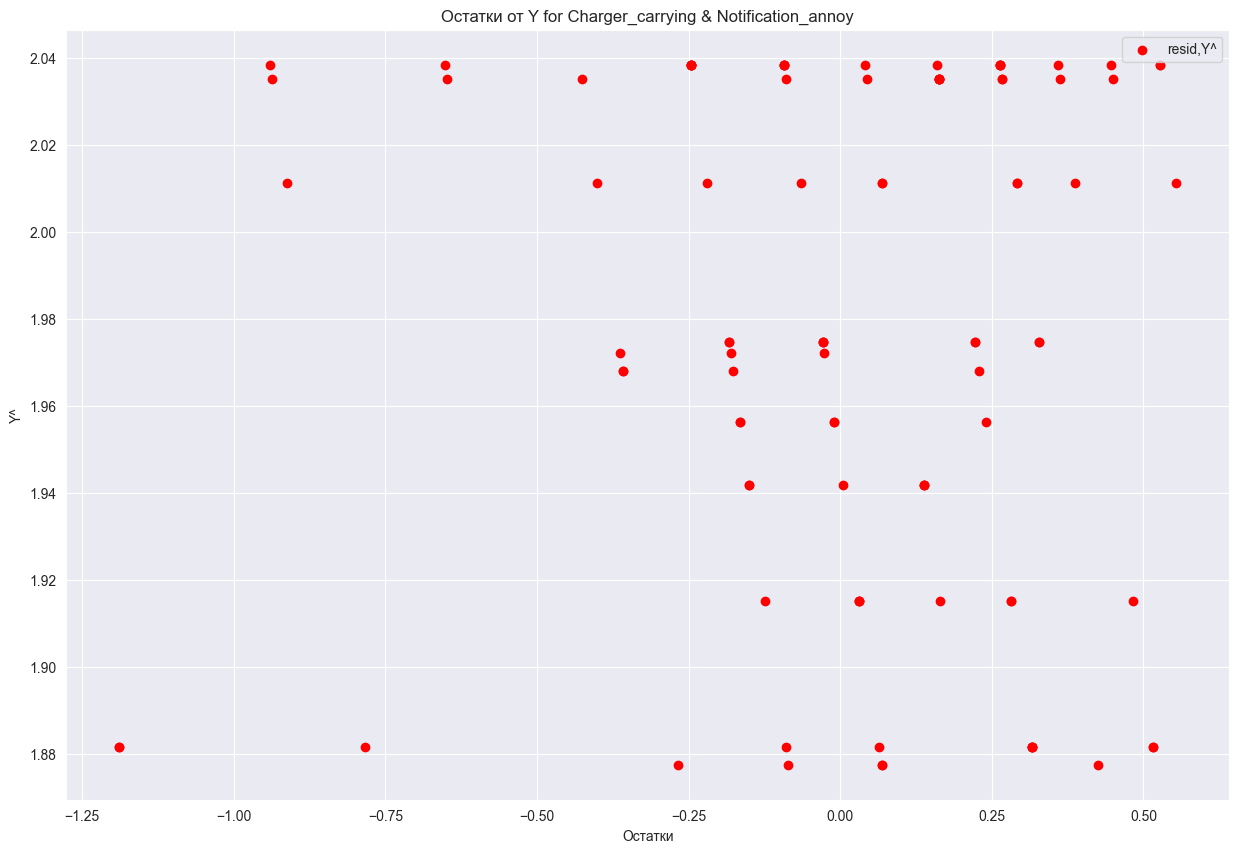

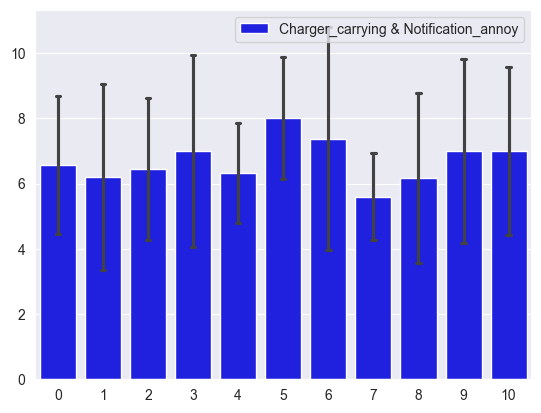

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.270
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.288
Time:                        09:06:17   Log-Likelihood:                -38.135
No. Observations:                  96   AIC:                             86.27
Df Residuals:                      91   BIC:                             99.09
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -572.7405    294.252     -1.946      0.0

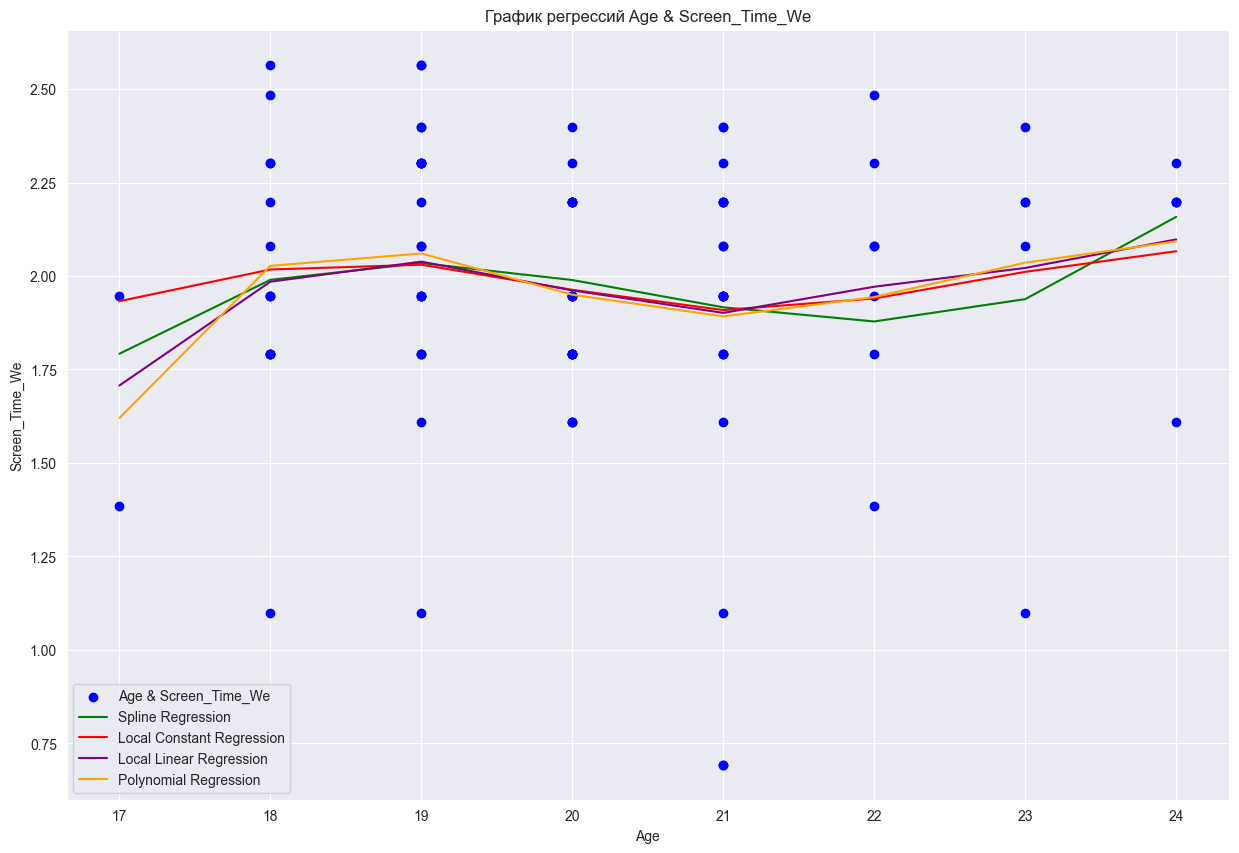

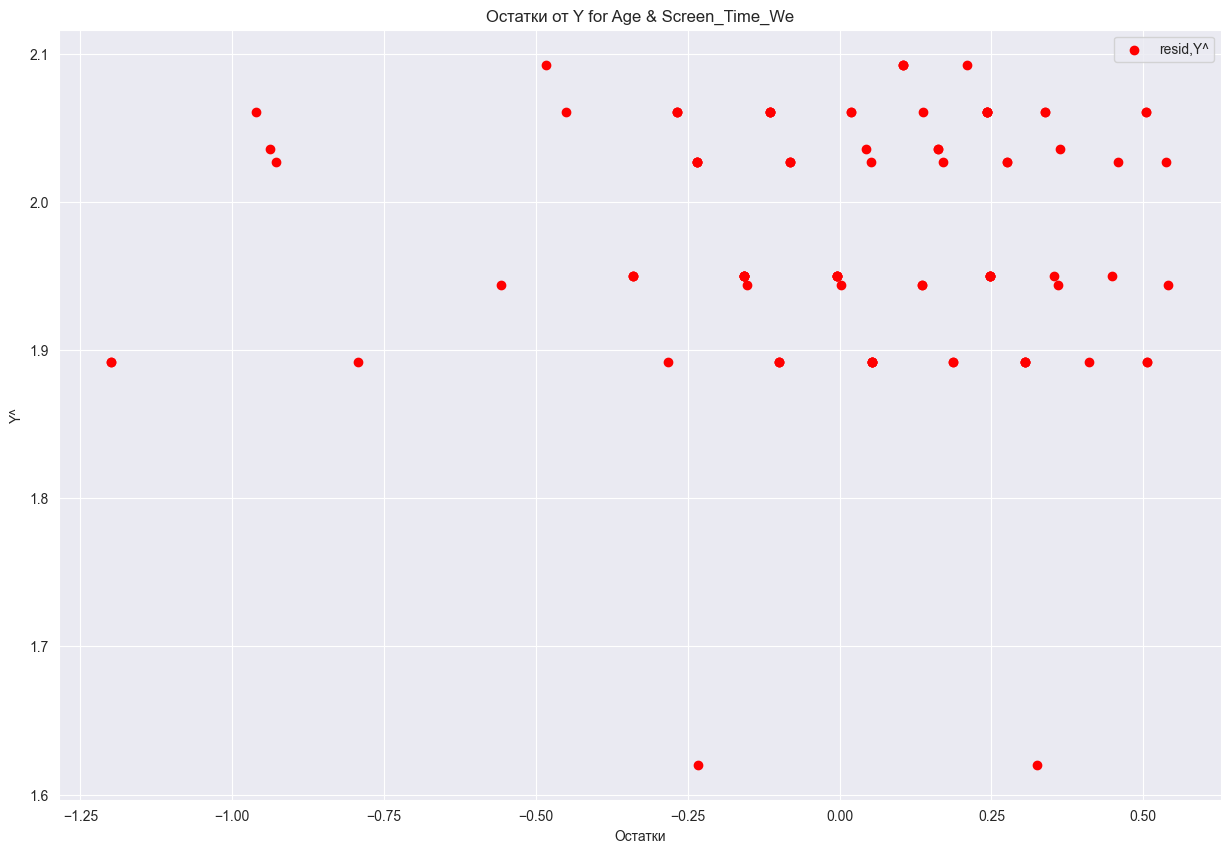

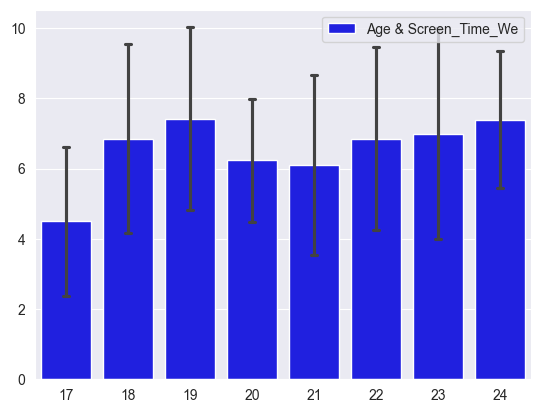

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.7427
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.565
Time:                        09:06:20   Log-Likelihood:                -39.200
No. Observations:                  96   AIC:                             88.40
Df Residuals:                      91   BIC:                             101.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.9227    297.536      0.107      0.9

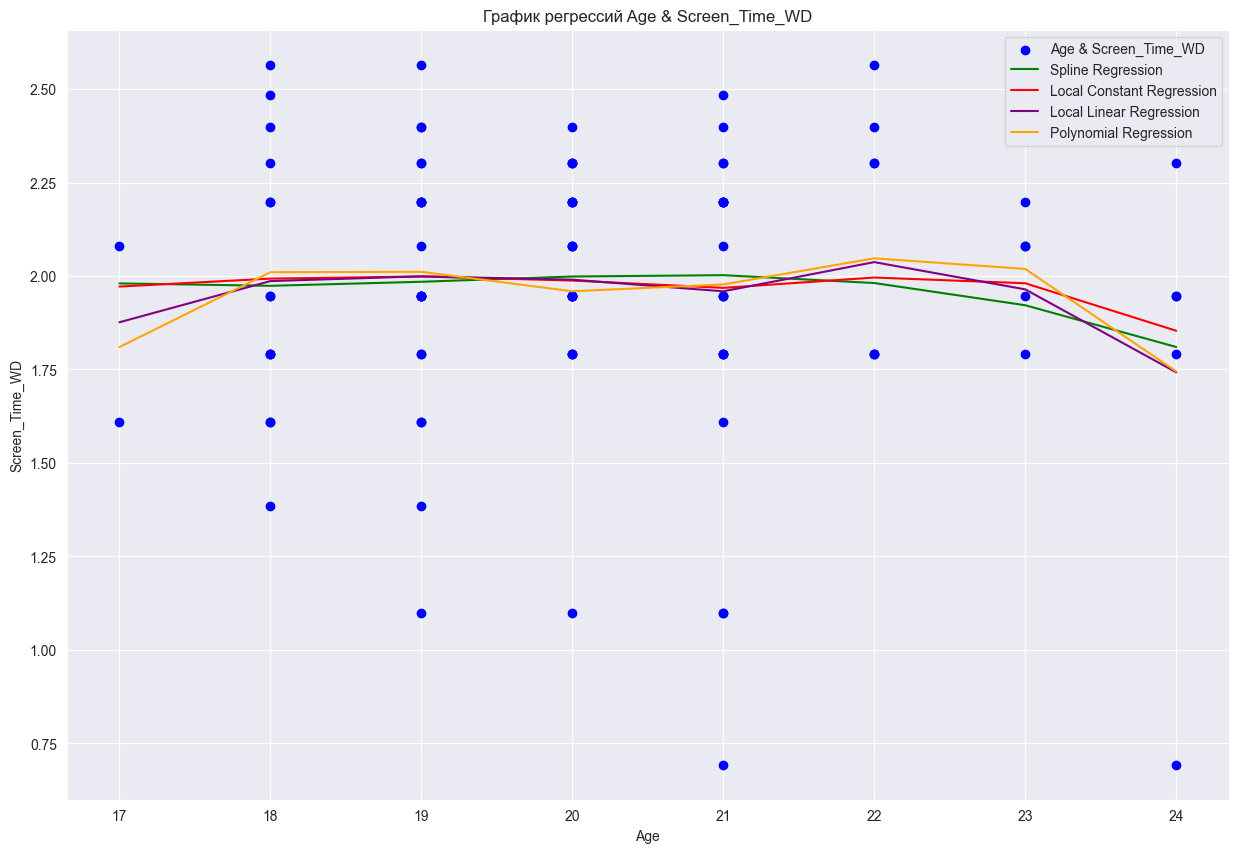

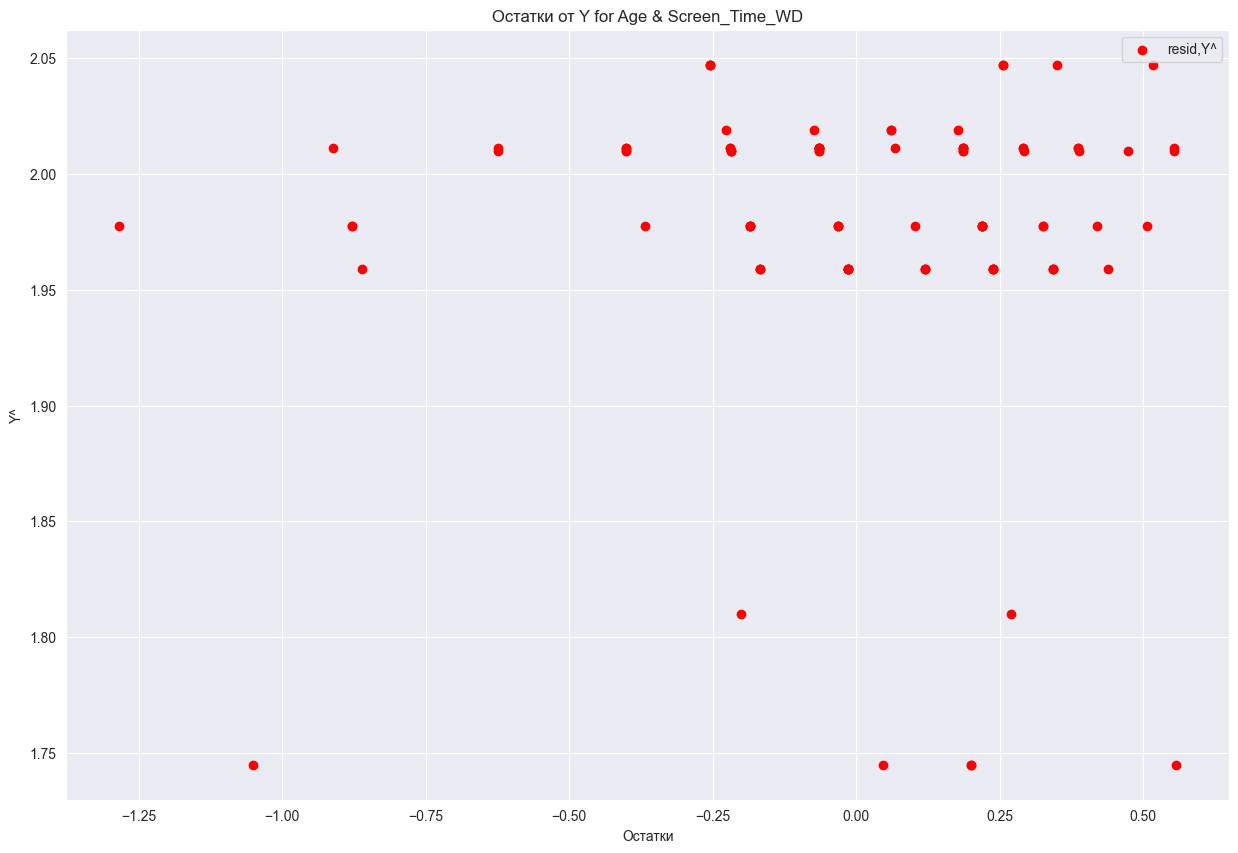

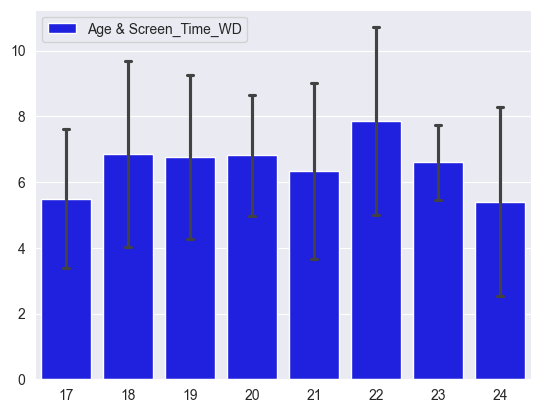

In [52]:
from scipy.interpolate import splrep, splev
import statsmodels
import pc
from statsmodels.nonparametric.kernel_regression import KernelReg
import statsmodels.api as sm
import statsmodels.stats.api as ssa
from sklearn.linear_model import LinearRegression
import scipy
import numpy as np
import random
import sklearn
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import f
from statsmodels.stats.outliers_influence import summary_table


def f1(x, y, y_pred):
    rss = np.sum((y - y_pred)**2)
    
    tss = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (rss / tss)
    
    n = len(x)
    df_num = 1
    df_denom = n - df_num - 1
    
    f_statistic = ((tss - rss) / df_num) / (rss / df_denom)
    f_p_value = f.sf(f_statistic, df_num, df_denom)
    
    print("RSS:", rss)
    print("R-squared:", r_squared)
    print("F-statistic:", f_statistic)
    print("F p-value:", f_p_value)

# Локально постоянная и линейная регрессия
def local_constant_regression(X, Y, kernel):
    model = KernelReg(Y, X, var_type='u', reg_type='lc', bw='cv_ml', ukertype=kernel)
    return model

def local_linear_regression(X, Y, kernel):
    model = KernelReg(Y, X, var_type='u', reg_type='ll', bw='cv_ml', ukertype=kernel)
    return model

def spline_regression(X, Y):
    temp = (len(X)-math.sqrt(2*len(X))+len(X)+math.sqrt(2*len(X)))/2
    xs = sorted(zip(X, Y), key=lambda tup: tup[0])
    x_sorted = [x[0] for x in xs]
    y_sorted = [x[1] for x in xs] 
    # x_sorted = X
    # y_sorted = Y
    tck = splrep(x_sorted, y_sorted, s=temp)
    y_smooth = splev(x_sorted, tck, der=0)
    return x_sorted, y_smooth

#-------------------------------------------------------------------------------------------------------------------------
#-----------------------------------'Charger_carrying & Screen_Time_We----------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------

np.array(Charger_carrying)
X0 = np.ones(len(Screen_Time_We))
X = np.array(Charger_carrying)

xs = sorted(zip(X, Screen_Time_We), key=lambda tup: tup[0])
X = [x[0] for x in xs]
Screen_Time_We = [x[1] for x in xs] 

X = np.array(X)
Y = np.log(np.array(Screen_Time_We) + 1)
X_poly = sm.add_constant(np.column_stack((X0, X, X**2, np.log(X+1), np.sin(X))))

#Линейная регрессия
model1 = sm.OLS(Y, X_poly).fit()

#Сплайн
x_spline, y_spline = spline_regression(X, Y)

# Регрессия по ядрам
kernels = ['aitchison_aitken_reg', 'aitchisonaitken', "gaussian"]
for kernel in kernels:
    results_lc = local_constant_regression(X, Y, kernel)
    results_ll = local_linear_regression(X, Y, kernel)


b = model1.params
Y_plt = b[0] + b[1] * X + b[2]* X**2 + b[3]* np.log(X+1) + b[4] * np.sin(X)
print(model1.summary())

test01 = ssa.het_breuschpagan(model1.resid**2, X_poly)
print("Тест Бройша - Пагана на Гетероскед для Charger_carrying & Screen_Time_We : ",test01)
test02 = ssa.het_white(model1.resid**2, X_poly)
print("Тест на Гетероск White для Charger_carrying & Screen_Time_We : ",test02, "\n")
test03 = ssa.het_goldfeldquandt(model1.resid**2, X_poly)
print("Тест Голфреда-Кванта на Гетероск для Charger_carrying & Screen_Time_We : ",test03, "\n")


print("\n coeff [const, X, X^2, log(X+1), sin(X)] = ",model1.params)
print("\n std_ err [const, X, X^2, log(X+1), sin(X)] = ", model1.bse, "\n")

print("Polynomial Regression: ")
f1(X, Y, Y_plt)

print("\nLocal Constant Regression: ")
f1(X, Y, results_lc.fit(X)[0])

print("\nLocal Linear Regression: ")
f1(X, Y, results_ll.fit(X)[0])

print("\nSpline Regression: ")
f1(x_spline, Y, y_spline) 


plt.figure(figsize=(15, 10))
plt.scatter(X, Y, color='blue', label='Charger_carrying & Screen_Time_We')
plt.plot(x_spline, y_spline, color='green', label='Spline Regression')
plt.plot(X, results_lc.fit(X)[0], color='red', label='Local Constant Regression')
plt.plot(X, results_ll.fit(X)[0], color='purple', label='Local Linear Regression')
plt.plot(X, Y_plt, color='orange', label='Polynomial Regression')
plt.title('График регрессий Screen_Time_We & Charger_carrying')
plt.ylabel('Screen_Time_We')
plt.xlabel('Charger_carrying')
plt.legend()
plt.savefig('График регрессий Screen_Time_We & Charger_carrying.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(model1.resid, Y_plt, color='r', label='resid,Y^')
plt.title('Остатки от Y for Screen_Time_We & Charger_carrying')
plt.ylabel('Y^')
plt.xlabel('Остатки')
plt.legend()
plt.savefig('График остатков Screen_Time_We & Charger_carrying.png', dpi=300, bbox_inches='tight')
plt.show()

_= sns.barplot(data=data, 
               x=Charger_carrying, 
               y=Screen_Time_We, errorbar='sd',color = 'b', 
               capsize=0.1, label="Charger_carrying & Screen_Time_We")
plt.savefig('Гистограмма Screen_Time_We & Charger_carrying.png', dpi=300, bbox_inches='tight')
plt.show()

#-------------------------------------------------------------------------------------------------------------------------
#-----------------------------------'Charger_carrying & Screen_Time_WD----------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------

X = np.array(Charger_carrying)

xs = sorted(zip(X, Screen_Time_WD), key=lambda tup: tup[0])
X = [x[0] for x in xs]
Screen_Time_We = [x[1] for x in xs] 

X = np.array(X)
Y = np.log(np.array(Screen_Time_WD) + 1)
X_poly = sm.add_constant(np.column_stack((X0, X, X**2, np.log(X+1), np.sin(X))))

#Линейная регрессия
model1 = sm.OLS(Y, X_poly).fit()

#Сплайн
x_spline, y_spline = spline_regression(X, Y)

# Регрессия по ядрам
kernels = ['aitchison_aitken_reg', 'aitchisonaitken', "gaussian"]
for kernel in kernels:
    results_lc = local_constant_regression(X, Y, kernel)
    results_ll = local_linear_regression(X, Y, kernel)


b = model1.params
Y_plt = b[0] + b[1] * X + b[2]* X**2 + b[3]* np.log(X+1) + b[4] * np.sin(X)
print(model1.summary())

test01 = ssa.het_breuschpagan(model1.resid**2, X_poly)
print("Тест Бройша - Пагана на Гетероскед для Charger_carrying & Screen_Time_WD : ",test01)
test02 = ssa.het_white(model1.resid**2, X_poly)
print("Тест на Гетероск White для Charger_carrying & Screen_Time_WD : ",test02, "\n")
test03 = ssa.het_goldfeldquandt(model1.resid**2, X_poly)
print("Тест Голфреда-Кванта на Гетероск для Charger_carrying & Screen_Time_WD: ",test03, "\n")

print("\n coeff [const, X, X^2, log(X+1), sin(X)] = ",model1.params)
print("\n std_ err [const, X, X^2, log(X+1), sin(X)] = ", model1.bse, "\n")
print("Polynomial Regression: ")
f1(X, Y, Y_plt)

print("\nLocal Constant Regression: ")
f1(X, Y, results_lc.fit(X)[0])

print("\nLocal Linear Regression: ")
f1(X, Y, results_ll.fit(X)[0])

print("\nSpline Regression: ")
f1(x_spline, Y, y_spline) 

plt.figure(figsize=(15, 10))
plt.scatter(X, Y, color='blue', label='Charger_carrying & Screen_Time_WD')
plt.plot(x_spline, y_spline, color='green', label='Spline Regression')
plt.plot(X, results_lc.fit(X)[0], color='red', label='Local Constant Regression')
plt.plot(X, results_ll.fit(X)[0], color='purple', label='Local Linear Regression')
plt.plot(X, Y_plt, color='orange', label='Polynomial Regression')
plt.title('График регрессий Charger_carrying & Screen_Time_WD')
plt.ylabel('Screen_Time_WD')
plt.xlabel('Charger_carrying')
plt.legend()
plt.savefig('График регрессий Charger_carrying & Screen_Time_WD.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(model1.resid, Y_plt, color='r', label='resid,Y^')
plt.title('Остатки от Y for Charger_carrying & Screen_Time_WD')
plt.ylabel('Y^')
plt.xlabel('Остатки')
plt.legend()
plt.savefig('График остатков Charger_carrying & Screen_Time_WD.png', dpi=300, bbox_inches='tight')
plt.show()

_= sns.barplot(data=data, 
               x=Charger_carrying, 
               y=Screen_Time_WD, errorbar='sd',color = 'b', 
               capsize=0.1, label="Charger_carrying & Screen_Time_WD")
plt.savefig('Гистограмма Charger_carrying & Screen_Time_WD.png', dpi=300, bbox_inches='tight')
plt.show()

#-------------------------------------------------------------------------------------------------------------------------
#-----------------------------------'Charger_carrying & Notification_annoy----------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------

X = np.array(Charger_carrying)

xs = sorted(zip(X, Notification_annoy), key=lambda tup: tup[0])
X = [x[0] for x in xs]
Notification_annoy = [x[1] for x in xs] 

X = np.array(X)
Y = np.log(np.array(Notification_annoy) + 1)
X_poly = sm.add_constant(np.column_stack((X0, X, X**2, np.log(X+1), np.sin(X))))

#Линейная регрессия
model1 = sm.OLS(Y, X_poly).fit()

#Сплайн
x_spline, y_spline = spline_regression(X, Y)

# Регрессия по ядрам
kernels = ['aitchison_aitken_reg', 'aitchisonaitken', "gaussian"]
for kernel in kernels:
    results_lc = local_constant_regression(X, Y, kernel)
    results_ll = local_linear_regression(X, Y, kernel)


b = model1.params
Y_plt = b[0] + b[1] * X + b[2]* X**2 + b[3]* np.log(X+1) + b[4] * np.sin(X)
print(model1.summary())
test01 = ssa.het_breuschpagan(model1.resid**2, X_poly)
print("Тест Бройша - Пагана на Гетероскед для Charger_carrying & Notification_annoy : ",test01)
test02 = ssa.het_white(model1.resid**2, X_poly)
print("Тест на Гетероск White для Charger_carrying & Notification_annoy : ",test02, "\n")
test03 = ssa.het_goldfeldquandt(model1.resid**2, X_poly)
print("Тест Голфреда-Кванта на Гетероск для Charger_carrying & Notification_annoy: ",test03, "\n")

print("\n coeff [const, X, X^2, log(X+1), sin(X)] = ",model1.params)
print("\n std_ err [const, X, X^2, log(X+1), sin(X)] = ", model1.bse, "\n")
print("Polynomial Regression: ")
f1(X, Y, Y_plt)

print("\nLocal Constant Regression: ")
f1(X, Y, results_lc.fit(X)[0])

print("\nLocal Linear Regression: ")
f1(X, Y, results_ll.fit(X)[0])

print("\nSpline Regression: ")
f1(x_spline, Y, y_spline) 

plt.figure(figsize=(15, 10))
plt.scatter(X, Y, color='blue', label='Charger_carrying & Notification_annoy')
plt.plot(x_spline, y_spline, color='green', label='Spline Regression')
plt.plot(X, results_lc.fit(X)[0], color='red', label='Local Constant Regression')
plt.plot(X, results_ll.fit(X)[0], color='purple', label='Local Linear Regression')
plt.plot(X, Y_plt, color='orange', label='Polynomial Regression')
plt.title('График регрессий Charger_carrying & Notification_annoy')
plt.ylabel('Notification_annoy')
plt.xlabel('Charger_carrying')
plt.legend()
plt.savefig('График регрессий Charger_carrying & Notification_annoy.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(model1.resid, Y_plt, color='r', label='resid,Y^')
plt.title('Остатки от Y for Charger_carrying & Notification_annoy')
plt.ylabel('Y^')
plt.xlabel('Остатки')
plt.legend()
plt.savefig('График остатков Charger_carrying & Notification_annoy.png', dpi=300, bbox_inches='tight')
plt.show()

_= sns.barplot(data=data, 
               x=Charger_carrying, 
               y=Notification_annoy, errorbar='sd',color = 'b', 
               capsize=0.1, label="Charger_carrying & Notification_annoy")
plt.savefig('Гистограмма Charger_carrying & Notification_annoy.png', dpi=300, bbox_inches='tight')
plt.show()


#-------------------------------------------------------------------------------------------------------------------------
#-----------------------------------'Age & Screen_Time_We----------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------

X = np.array(Age)

xs = sorted(zip(X, Screen_Time_We), key=lambda tup: tup[0])
X = [x[0] for x in xs]
Notification_annoy = [x[1] for x in xs] 

X = np.array(X)
Y = np.log(np.array(Screen_Time_We) + 1)
X_poly = sm.add_constant(np.column_stack((X0, X, X**2, np.log(X+1), np.sin(X))))

#Линейная регрессия
model1 = sm.OLS(Y, X_poly).fit()

#Сплайн
x_spline, y_spline = spline_regression(X, Y)

# Регрессия по ядрам
kernels = ['aitchison_aitken_reg', 'aitchisonaitken', "gaussian"]
for kernel in kernels:
    results_lc = local_constant_regression(X, Y, kernel)
    results_ll = local_linear_regression(X, Y, kernel)


b = model1.params
Y_plt = b[0] + b[1] * X + b[2]* X**2 + b[3]* np.log(X+1) + b[4] * np.sin(X)
print(model1.summary())
test01 = ssa.het_breuschpagan(model1.resid**2, X_poly)
print("Тест Бройша - Пагана на Гетероскед для Age & Screen_Time_We : ",test01)
test02 = ssa.het_white(model1.resid**2, X_poly)
print("Тест на Гетероск White для Age & Screen_Time_We : ",test02, "\n")
test03 = ssa.het_goldfeldquandt(model1.resid**2, X_poly)
print("Тест Голфреда-Кванта на Гетероск для Age & Screen_Time_We: ",test03, "\n")

print("\n coeff [const, X, X^2, log(X+1), sin(X)] = ",model1.params)
print("\n std_ err [const, X, X^2, log(X+1), sin(X)] = ", model1.bse, "\n")
print("Polynomial Regression: ")
f1(X, Y, Y_plt)

print("\nLocal Constant Regression: ")
f1(X, Y, results_lc.fit(X)[0])

print("\nLocal Linear Regression: ")
f1(X, Y, results_ll.fit(X)[0])

print("\nSpline Regression: ")
f1(x_spline, Y, y_spline) 

plt.figure(figsize=(15, 10))
plt.scatter(X, Y, color='blue', label='Age & Screen_Time_We')
plt.plot(x_spline, y_spline, color='green', label='Spline Regression')
plt.plot(X, results_lc.fit(X)[0], color='red', label='Local Constant Regression')
plt.plot(X, results_ll.fit(X)[0], color='purple', label='Local Linear Regression')
plt.plot(X, Y_plt, color='orange', label='Polynomial Regression')
plt.title('График регрессий Age & Screen_Time_We')
plt.ylabel('Screen_Time_We')
plt.xlabel('Age')
plt.legend()
plt.savefig('График регрессий Age & Screen_Time_We.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(model1.resid, Y_plt, color='r', label='resid,Y^')
plt.title('Остатки от Y for Age & Screen_Time_We')
plt.ylabel('Y^')
plt.xlabel('Остатки')
plt.legend()
plt.savefig('График остатков Age & Screen_Time_We.png', dpi=300, bbox_inches='tight')
plt.show()

_= sns.barplot(data=data, 
               x=Age, 
               y=Screen_Time_We, errorbar='sd',color = 'b', 
               capsize=0.1, label="Age & Screen_Time_We")
plt.savefig('Гистограмма Age & Screen_Time_We.png', dpi=300, bbox_inches='tight')
plt.show()


#-------------------------------------------------------------------------------------------------------------------------
#-----------------------------------'Age & Screen_Time_WD----------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------

X = np.array(Age)

xs = sorted(zip(X, Screen_Time_WD), key=lambda tup: tup[0])
X = [x[0] for x in xs]
Notification_annoy = [x[1] for x in xs] 

X = np.array(X)
Y = np.log(np.array(Screen_Time_WD) + 1)
X_poly = sm.add_constant(np.column_stack((X0, X, X**2, np.log(X+1), np.sin(X))))

#Линейная регрессия
model1 = sm.OLS(Y, X_poly).fit()

#Сплайн
x_spline, y_spline = spline_regression(X, Y)

# Регрессия по ядрам
kernels = ['aitchison_aitken_reg', 'aitchisonaitken', "gaussian"]
for kernel in kernels:
    results_lc = local_constant_regression(X, Y, kernel)
    results_ll = local_linear_regression(X, Y, kernel)


b = model1.params
Y_plt = b[0] + b[1] * X + b[2]* X**2 + b[3]* np.log(X+1) + b[4] * np.sin(X)
print(model1.summary())

test01 = ssa.het_breuschpagan(model1.resid**2, X_poly)
print("Тест Бройша - Пагана на Гетероскед для Age & Screen_Time_WD : ",test01)
test02 = ssa.het_white(model1.resid**2, X_poly)
print("Тест на Гетероск White для Age & Screen_Time_WD : ",test02, "\n")
test03 = ssa.het_goldfeldquandt(model1.resid**2, X_poly)
print("Тест Голфреда-Кванта на Гетероск для Age & Screen_Time_WD: ",test03, "\n")

print("\n coeff [const, X, X^2, log(X+1), sin(X)] = ",model1.params)
print("\n std_ err [const, X, X^2, log(X+1), sin(X)] = ", model1.bse, "\n")
print("Polynomial Regression: ")
f1(X, Y, Y_plt)

print("\nLocal Constant Regression: ")
f1(X, Y, results_lc.fit(X)[0])

print("\nLocal Linear Regression: ")
f1(X, Y, results_ll.fit(X)[0])

print("\nSpline Regression: ")
f1(x_spline, Y, y_spline) 

plt.figure(figsize=(15, 10))
plt.scatter(X, Y, color='blue', label='Age & Screen_Time_WD')
plt.plot(x_spline, y_spline, color='green', label='Spline Regression')
plt.plot(X, results_lc.fit(X)[0], color='red', label='Local Constant Regression')
plt.plot(X, results_ll.fit(X)[0], color='purple', label='Local Linear Regression')
plt.plot(X, Y_plt, color='orange', label='Polynomial Regression')
plt.title('График регрессий Age & Screen_Time_WD')
plt.ylabel('Screen_Time_WD')
plt.xlabel('Age')
plt.legend()
plt.savefig('График регрессий Age & Screen_Time_WD.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(model1.resid, Y_plt, color='r', label='resid,Y^')
plt.title('Остатки от Y for Age & Screen_Time_WD')
plt.ylabel('Y^')
plt.xlabel('Остатки')
plt.legend()
plt.savefig('График остатков Age & Screen_Time_WD.png', dpi=300, bbox_inches='tight')
plt.show()

_= sns.barplot(data=data, 
               x=Age, 
               y=Screen_Time_WD, errorbar='sd',color = 'b', 
               capsize=0.1, label="Age & Screen_Time_WD")
plt.savefig('Гистограмма Age & Screen_Time_WD.png', dpi=300, bbox_inches='tight')
plt.show()
